 Probability theory is nothing but common sense reduced to calculation. ... [Probability] is thus simply a fraction whose numerator is the number of favorable cases and whose denominator is the number of all the cases possible ... when nothing leads us to expect that any one of these cases should occur more than any other. 

To untangle a probability problem, all you have to do is define exactly what the cases are, and carefully count the favorable and total cases. Let's be clear on our vocabulary words:

Trial: A single occurrence with an outcome that is uncertain until it happens.
For example, rolling a single die.
Outcome: A possible result of a trial; one particular state of the world. What Laplace calls a case.
For example: the die comes up as 4.
Sample Space: The set of all possible outcomes for the trial.
For example, {1, 2, 3, 4, 5, 6}.
Event: A subset of the sample space, a set of outcomes that together have some property we are interested in.
For example, the event "even die roll" is the set of outcomes {2, 4, 6}.
Probability: As Laplace said, the probability of an event with respect to a sample space is the "number of favorable cases" (outcomes from the sample space that are in the event) divided by the "number of all the cases" in the sample space, assuming "nothing leads us to expect that any one of these cases should occur more than any other." Since this is a proper fraction, probability will always be a number between 0 (representing an impossible event) and 1 (representing a certain event).
For example, the probability of an even die roll is 3/6 = 1/2.
This notebook will explore these concepts in a concrete way using Python code. The code is meant to be succint and explicit, and fast enough to handle sample spaces with millions of outcomes. If you need to handle trillions, you'll want a more efficient implementation. I also have another notebook that covers paradoxes in Probability Theory.

In [1]:
from fractions import Fraction 
from itertools import combinations, product
from typing import *
import math
import random 



In [2]:
Space = set # a simple space is a set of all possible outcomes 
Event = set # an event is a subset of the sample space 


# P is for Probability
The code below implements Laplace's quote directly: Probability is thus simply a fraction whose numerator is the number of favorable cases and whose denominator is the number of all the cases possible

In [3]:
def P(event: Event, space: Space) -> Fraction:
    """The probability of an event, given a sample space:
    the number of favorable cases divided by the number of all the cases possible."""
    return Fraction(number_cases(favorable(event, space)),
                    number_cases(space))

In [4]:
favorable    = set.intersection # Favorable cases are in the event and also in the sample space
number_cases = len              # The number of cases is the length, or size, of a set

# Die Roll
What's the probability of an even number with a single roll of a six-sided fair die?

Mathematicians traditionally use a single capital letter to denote a sample space; I'll use D for the die:

In [5]:
D = {1, 2, 3, 4, 5, 6}

then define the event of rolling an even number, and ask for the probability of that event:

In [6]:
even = {2, 4, 6} # the event of an even roll

P(even, D)

Fraction(1, 2)

In [7]:
odd = {1, 3, 5, 7, 9, 11, 13}

In [8]:
prime = {2, 3, 5, 7, 11, 13}

P((even | prime), D) # The probability of an even or prime die roll

Fraction(5, 6)

In [9]:
P((odd & prime), D) # The probability of an odd prime die roll

Fraction(1, 3)

# Card Problems
Consider a deck of playing cards. An individual card has a rank and suit, and will be represented as a string, like 'A♥' for the Ace of Hearts. There are 4 suits and 13 ranks, so there are 52 cards in a deck:

In [10]:
suits = '♥♠♦♣'
ranks = 'AKQJT98765432'
deck = [r + s for r in ranks for s in suits]
len(deck)

52

lets define Hands as the sample space of all possible 5-card hands that could be dealt from a deck. The function itertools.combinations does most of the work; we then concatenate the combinations into space-separateds string using joins:

In [11]:
def joins(strings) -> Set[str]: return {' '. join(s) for s in strings} 
Hands = joins(combinations(deck, 5)) 
len(Hands)

2598960

In [12]:
random.sample(list(Hands), 7)

['A♣ 8♠ 8♦ 2♦ 2♣',
 'K♦ 9♥ 9♣ 6♥ 5♠',
 'A♥ J♠ T♦ 4♦ 4♣',
 'K♣ 8♦ 7♠ 3♣ 2♦',
 'K♠ 5♥ 4♦ 3♣ 2♠',
 '6♥ 5♦ 3♥ 3♠ 2♦',
 'K♥ T♥ 4♥ 2♥ 2♠']

what is the probability of being dealt a flush (5 cards of the same suit): 

In [13]:
flush = {hand for hand in Hands if any(hand.count(suit) == 5 for suit in suits)} 
P(flush, Hands)

Fraction(33, 16660)

lets look at four of a kind

In [14]:
four_kind = {hand for hand in Hands if any(hand.count(rank) == 4 for rank in ranks)}

P(four_kind, Hands)

Fraction(1, 4165)

#  Urn Problems
Around 1700, Jacob Bernoulli wrote about removing colored balls from an urn in his landmark treatise Ars Conjectandi, and ever since then, explanations of probability have relied on urn problems.

An urn contains 6 blue, 9 red, and 8 white balls. We select six balls at random. What is the probability of each of these outcomes:

All balls are red.
3 are blue, and 1 is red, and 2 are white.
Exactly 4 balls are white.

In [15]:
def names(name: str, n) -> List[str]:
    """A list of `n` distinct names."""
    return [name + str(i) for i in range(1, n + 1)]

urn = names('B', 6) + names('R', 9) + names('W', 8)
urn

['B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'B6',
 'R1',
 'R2',
 'R3',
 'R4',
 'R5',
 'R6',
 'R7',
 'R8',
 'R9',
 'W1',
 'W2',
 'W3',
 'W4',
 'W5',
 'W6',
 'W7',
 'W8']

In [16]:
U6 = joins(combinations(urn, 6))

random.sample(list(U6), 5) # A sample from the U6 set

['B3 R5 R6 R8 R9 W1',
 'B3 B6 W1 W2 W4 W6',
 'B2 R1 R4 R7 R8 W7',
 'B3 B4 B5 R1 R8 W5',
 'B2 B6 R4 R7 R8 W1']

In [17]:
def select(color, n, space=U6) -> set:
    "The subset of the sample space with exactly `n` balls of given `color`."
    return {s for s in space if s.count(color) == n}

In [18]:
P(select('R', 6), U6) # Probability that all 6 balls are red.

Fraction(4, 4807)

In [19]:
P(select('B', 3)  & select('R', 1) & select('W', 2), U6) # Probability that 3 are blue, and 1 is red, and 2 are white

Fraction(240, 4807)

# Urn problems via arithmetic
Let's verify these calculations using basic arithmetic, rather than exhaustive counting. First, how many ways can I choose 6 out of 9 red balls? It could be any of the 9 for the first ball, any of 8 remaining for the second, and so on down to any of the remaining 4 for the sixth and final ball. But we don't care about the order of the six balls, so divide that product by the number of permutations of 6 things, which is 6!, giving us 9 × 8 × 7 × 6 × 5 × 4 / 6! = 84. In general, the number of ways of choosing k out of n items is (n choose k) = n! / ((n - c)! × c!). In Python 3.8+ that is provided as the math.comb function.

Now we can verify the answers to the three problems. (Since P computes a ratio and choose computes a count, I multiply the left-hand-side by N, the length of the sample space, to make both sides be counts.)

In [20]:
N = len(U6)

assert math.comb(9, 6) == 84

assert (N * P(select('R', 6), U6) ==
        math.comb(9, 6))

assert (N * P(select('B', 3) & select('W', 2) & select('R', 1), U6) ==
        math.comb(6, 3) * math.comb(8, 2) * math.comb(9, 1))

assert (N * P(select('W', 4), U6) == 
        math.comb(8, 4) * math.comb(6 + 9, 2))  # (6 + 9 non-white balls)

In [21]:
P(select('R', 6), U6) , math.comb(9, 6) / N

(Fraction(4, 4807), 0.0008321198252548367)

# Non-Equiprobable Outcomes
So far, we have accepted Laplace's assumption that nothing leads us to expect that any one of these cases should occur more than any other. In real life, we often get outcomes that are not equiprobable--for example, a loaded die favors one side over the others. We will introduce three more vocabulary items:

Frequency: a non-negative number describing how often an outcome occurs. It Can be a count like 5, or a ratio like 1/6.
Distribution: A mapping from outcome to frequency of that outcome. We will allow a sample spaces to be either a set (of equi-probable outcomes) or a distribution.
Probability Distribution: A probability distribution is a distribution whose frequencies sum to 1.

In [22]:
class Dist(Counter):
    "A Distribution of {outcome: frequency} pairs."

Space = Union[set, Dist]

Because a Dist is a Counter, we can initialize it three different ways:

With a collection of outcomes (equiprobable or not).
With a mapping of {outcome: frequency} pairs.
With keyword arguments, each being assigned a frequency number.

In [23]:
assert Dist('THHHTTHHT')  ==  Dist({'H': 5, 'T': 4})  ==  Dist(H=5, T=4)

Now I will modify the code to handle distributions. Here's my plan:

The function P is unchanged. Laplace's advice still stands!
A sample space can be either a set or a distribution, so I will redefine three helper functions:
number_cases now sums the frequencies in a distribution (it previously counted the length).
favorable now returns a Dist of favorable outcomes and their frequencies (not a set).
Fraction now uses "/", not fractions.Fraction, because frequencies might be floats.

In [24]:
def number_cases(outcomes) -> float:
    """The total frequency of all the outcomes."""
    return sum(cast(outcomes, Dist).values())

def favorable(event: Event, space: Space) -> Dist:
    """A distribution of outcomes from the sample space that are in the event."""
    space = cast(space, Dist)
    return Dist({x: space[x] for x in space if x in event})

def Fraction(n, d): return n / d

def cast(object, typ: Type) -> object:
    """Convert `object` to `typ`, unless it is already of type `typ`."""
    return object if isinstance(object, typ) else typ(object)

here's the probability of rolling an even number with a crooked die that is loaded to prefer 6:

In [25]:
Crooked = Dist({1: 0.1, 2: 0.1, 3: 0.1, 4: 0.1, 5: 0.1, 6: 0.5})

P(even, Crooked)

0.7

Birth Counts
As another example, an article gives the following counts for two-child families in Denmark, where GB means a family where the first-born child is a girl and the second a boy (I'm aware that not all births can be classified as the binary "boy" or "girl," but this particular data set was reported that way):

In [26]:
DK = Dist(GG=121801, GB=126840, 
          BG=127123, BB=135138)

lets define some events 

In [27]:
first_girl  = {'GG', 'GB'}
second_girl = {'GG', 'BG'}
first_boy   = {'BB', 'BG'}
second_boy  = {'BB', 'GB'}
same        = {'GG', 'BB'}

And ask for the probability that, say, the first or second child is a girl, or that the two children have the same sex:

In [28]:
P(first_girl, DK)

0.48667063350701306

In [29]:
P(second_girl, DK)

0.4872245557856497

In [30]:
P(same, DK)

0.5029124959385557

# The St. Petersburg Paradox

A casino offers a game of chance for a single player in which a fair coin is tossed at each stage. The pot starts at 2 dollars and is doubled every time a head appears. The first time a tail appears, the game ends and the player wins whatever is in the pot. Thus the player wins 2 dollars if a tail appears on the first toss, 4 dollars if a head appears on the first toss and a tail on the second, etc. What is the expected value of this game to the player?

To calculate the expected value, we see there is a 1/2 chance of a tail on the first toss (yielding a pot of 2 dollars) and if not that, a 1/2 × 1/2 = 1/4 chance of a tail on the second toss (yielding a pot of 4 dollars), and so on.

Response 1: Limited Resources
The first major response to the paradox is that the casino's resources are limited. Once you break their bank, they can't pay out any more, and thus the expected return is finite

In [39]:
def st_pete(limit):
    "Return the probability distribution for the St. Petersburg Paradox with a limited bank."
    P = {}     # The probability distribution
    pot = 2    # Amount of money in the pot
    pr  = 1/2. # Probability that you end up with the amount in pot
    while pot < limit:
        P[pot] = pr
        pot    = pot * 2
        pr     = pr / 2
    P[limit] = pr * 2     # pr * 2 because you get limit for heads or tails
    return P



Let's try with the casino limited to 100 million dollars:

In [40]:
StP = st_pete(limit=10**8)
StP

{2: 0.5,
 4: 0.25,
 8: 0.125,
 16: 0.0625,
 32: 0.03125,
 64: 0.015625,
 128: 0.0078125,
 256: 0.00390625,
 512: 0.001953125,
 1024: 0.0009765625,
 2048: 0.00048828125,
 4096: 0.000244140625,
 8192: 0.0001220703125,
 16384: 6.103515625e-05,
 32768: 3.0517578125e-05,
 65536: 1.52587890625e-05,
 131072: 7.62939453125e-06,
 262144: 3.814697265625e-06,
 524288: 1.9073486328125e-06,
 1048576: 9.5367431640625e-07,
 2097152: 4.76837158203125e-07,
 4194304: 2.384185791015625e-07,
 8388608: 1.1920928955078125e-07,
 16777216: 5.960464477539063e-08,
 33554432: 2.9802322387695312e-08,
 67108864: 1.4901161193847656e-08,
 100000000: 1.4901161193847656e-08}

lets find the expected value of a probability distribution:

In [41]:
def EV(P):
    "The expected value of a probability distribution."
    return sum(P[v] * v 
               for v in P)

In [42]:
EV(StP)

27.490116119384766

This says that for a casino with a bankroll of 100 million dollars, if you want to maximize your expected value, you should be willing to pay up to $27.49 to play the game.

# Understanding St. Petersburg through Simulation

I will run the simulation 100,000 times (with a random seed specified for reproducability) and make the results into a probability distribution:

In [49]:
import random
from collections import Counter

# Flip a coin and return 'head' or 'tail'
def flip():
    return random.choice(('head', 'tail'))

# Simulate one round of the St. Petersburg game
def simulate_st_pete(limit=10**9):
    pot = 2
    while flip() == 'head':
        pot *= 2
        if pot > limit:
            return limit
    return pot

# Set seed for reproducibility
random.seed(123456)

# Run the simulation 100,000 times and count results
results_counter = Counter(simulate_st_pete() for _ in range(100000))

# Convert counts to a probability distribution
class ProbDist(dict):
    def __init__(self, counter):
        total = sum(counter.values())
        for k, v in counter.items():
            self[k] = v / total

results = ProbDist(results_counter)

# Example: print the sorted probability distribution
for payout in sorted(results):
    print(f"Payout: {payout}, Probability: {results[payout]:.6f}")


Payout: 2, Probability: 0.497550
Payout: 4, Probability: 0.250600
Payout: 8, Probability: 0.125900
Payout: 16, Probability: 0.063220
Payout: 32, Probability: 0.031510
Payout: 64, Probability: 0.016070
Payout: 128, Probability: 0.007510
Payout: 256, Probability: 0.003700
Payout: 512, Probability: 0.001910
Payout: 1024, Probability: 0.001060
Payout: 2048, Probability: 0.000450
Payout: 4096, Probability: 0.000290
Payout: 8192, Probability: 0.000100
Payout: 16384, Probability: 0.000060
Payout: 32768, Probability: 0.000050
Payout: 65536, Probability: 0.000010
Payout: 1048576, Probability: 0.000010


In [53]:
def EV(dist):
    return sum(x * p for x, p in dist.items())

# Expected Utility (EU)
def EU(dist, util):
    return sum(util(x) * p for x, p in dist.items())



# Set seed and run simulation
random.seed(123456)
results = ProbDist(Counter(simulate_st_pete() for _ in range(100000)))

# Calculate expected value and expected utility
print(f"Expected Value (EV): {EV(results):.2f}")


Expected Value (EV): 26.72


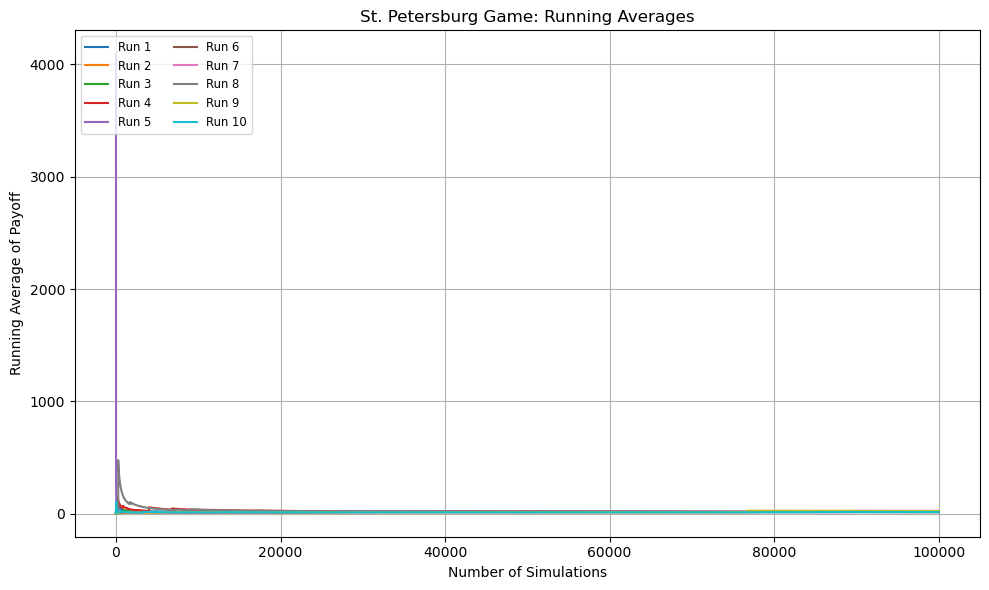

In [57]:

import matplotlib.pyplot as plt

# Already defined elsewhere:
# simulate_st_pete
# running_averages

def running_averages(iterable):
    "For each element in the iterable, yield the mean of all elements seen so far." 
    total, n = 0, 0
    for x in iterable:
        total, n = total + x, n + 1
        yield total / n

def plot_running_averages(fn, n, label=None):
    "Plot the running average of calling the function n times."
    data = list(running_averages(fn() for _ in range(n)))
    plt.plot(data, label=label)

# Set a reproducible seed
random.seed(12345)

# Plot multiple runs
plt.figure(figsize=(10, 6))
for i in range(10):
    plot_running_averages(simulate_st_pete, 100000, label=f'Run {i+1}')

plt.xlabel('Number of Simulations')
plt.ylabel('Running Average of Payoff')
plt.title('St. Petersburg Game: Running Averages')
plt.legend(loc='upper left', fontsize='small', ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()
